# Introduction to Backtesting Trading Strategies Using Zipline

Learn how to build and backtest trading strategies using zipline

## What is backtesting?

Let's start with a trading strategy. It can be defined as a method of buying and/or selling assets in markets that is based on predefined rules. These rules can be based on, for example, technical analysis or machine learning models.

Backtesting is basically evaluating the performance of a trading strategy on historical data - if we used a given strategy on a set of assets in the past, how well/bad would it have performed. Of course, there is no guarantee that past performance is indicative of the future one, but we can still investigate!

There are a few available frameworks for backtesting in Python, in this article, I decided to use zipline.


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
%load_ext zipline

In [3]:
from zipline.api import *
import logbook
log = logbook.Logger('algo')


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import zipline
from yahoofinancials import YahooFinancials
import warnings
%config InlineBackend.figure_format = 'retina'
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['figure.dpi'] = 200
warnings.simplefilter(action='ignore', category=FutureWarning)

In [8]:
!zipline bundles

/Users/mw/opt/anaconda3/lib/python3.8/site-packages/zipline/__main__.py:54: UserWarning: Failed to load extension: '/Users/mw/.zipline/extension.py'
int() argument must be a string, a bytes-like object or a number, not 'NaTType'
  load_extensions(
csvdir 2021-10-22 20:16:58.509372
quandl 2021-09-12 09:12:19.965686
quantopian-quandl 2021-02-12 09:36:13.693885


In [7]:
!zipline run --help

/Users/mw/opt/anaconda3/lib/python3.8/site-packages/zipline/__main__.py:54: UserWarning: Failed to load extension: '/Users/mw/.zipline/extension.py'
int() argument must be a string, a bytes-like object or a number, not 'NaTType'
  load_extensions(
Usage: zipline run [OPTIONS]

  Run a backtest for the given algorithm.

Options:
  -f, --algofile FILENAME         The file that contains the algorithm to run.
  -t, --algotext TEXT             The algorithm script to run.
  -D, --define TEXT               Define a name to be bound in the namespace
                                  before executing the algotext. For example
                                  '-Dname=value'. The value may be any python
                                  expression. These are evaluated in order so
                                  they may refer to previously defined names.
  --data-frequency [daily|minute]
                                  The data frequency of the simulation.
                                  


## Buy And Hold Strategy

We start with the most basic strategy - Buy and Hold. The idea is that we buy a certain asset and do not do anything for the entire duration of the investment horizon. This simple strategy can also be considered a benchmark for more advanced ones - because there is no point in using a very complex strategy that generates less money (for example due to transaction costs) than buying and doing nothing.

There are two approaches to using zipline - using the command line or Jupyter Notebook. To use the latter we have to write the algorithm within a Notebook cell and indicate that zipline is supposed to run it. This is done via the %%zipline IPython magic command. This magic takes the same arguments as the CLI mentioned above.

Also one important thing, all imports required for the algorithm to run (such as numpy, sklearn, etc.) must be specified in the algorithm cell, even if they were previously imported elsewhere.


### Using Zipline with **%%zipline** IPython magic command

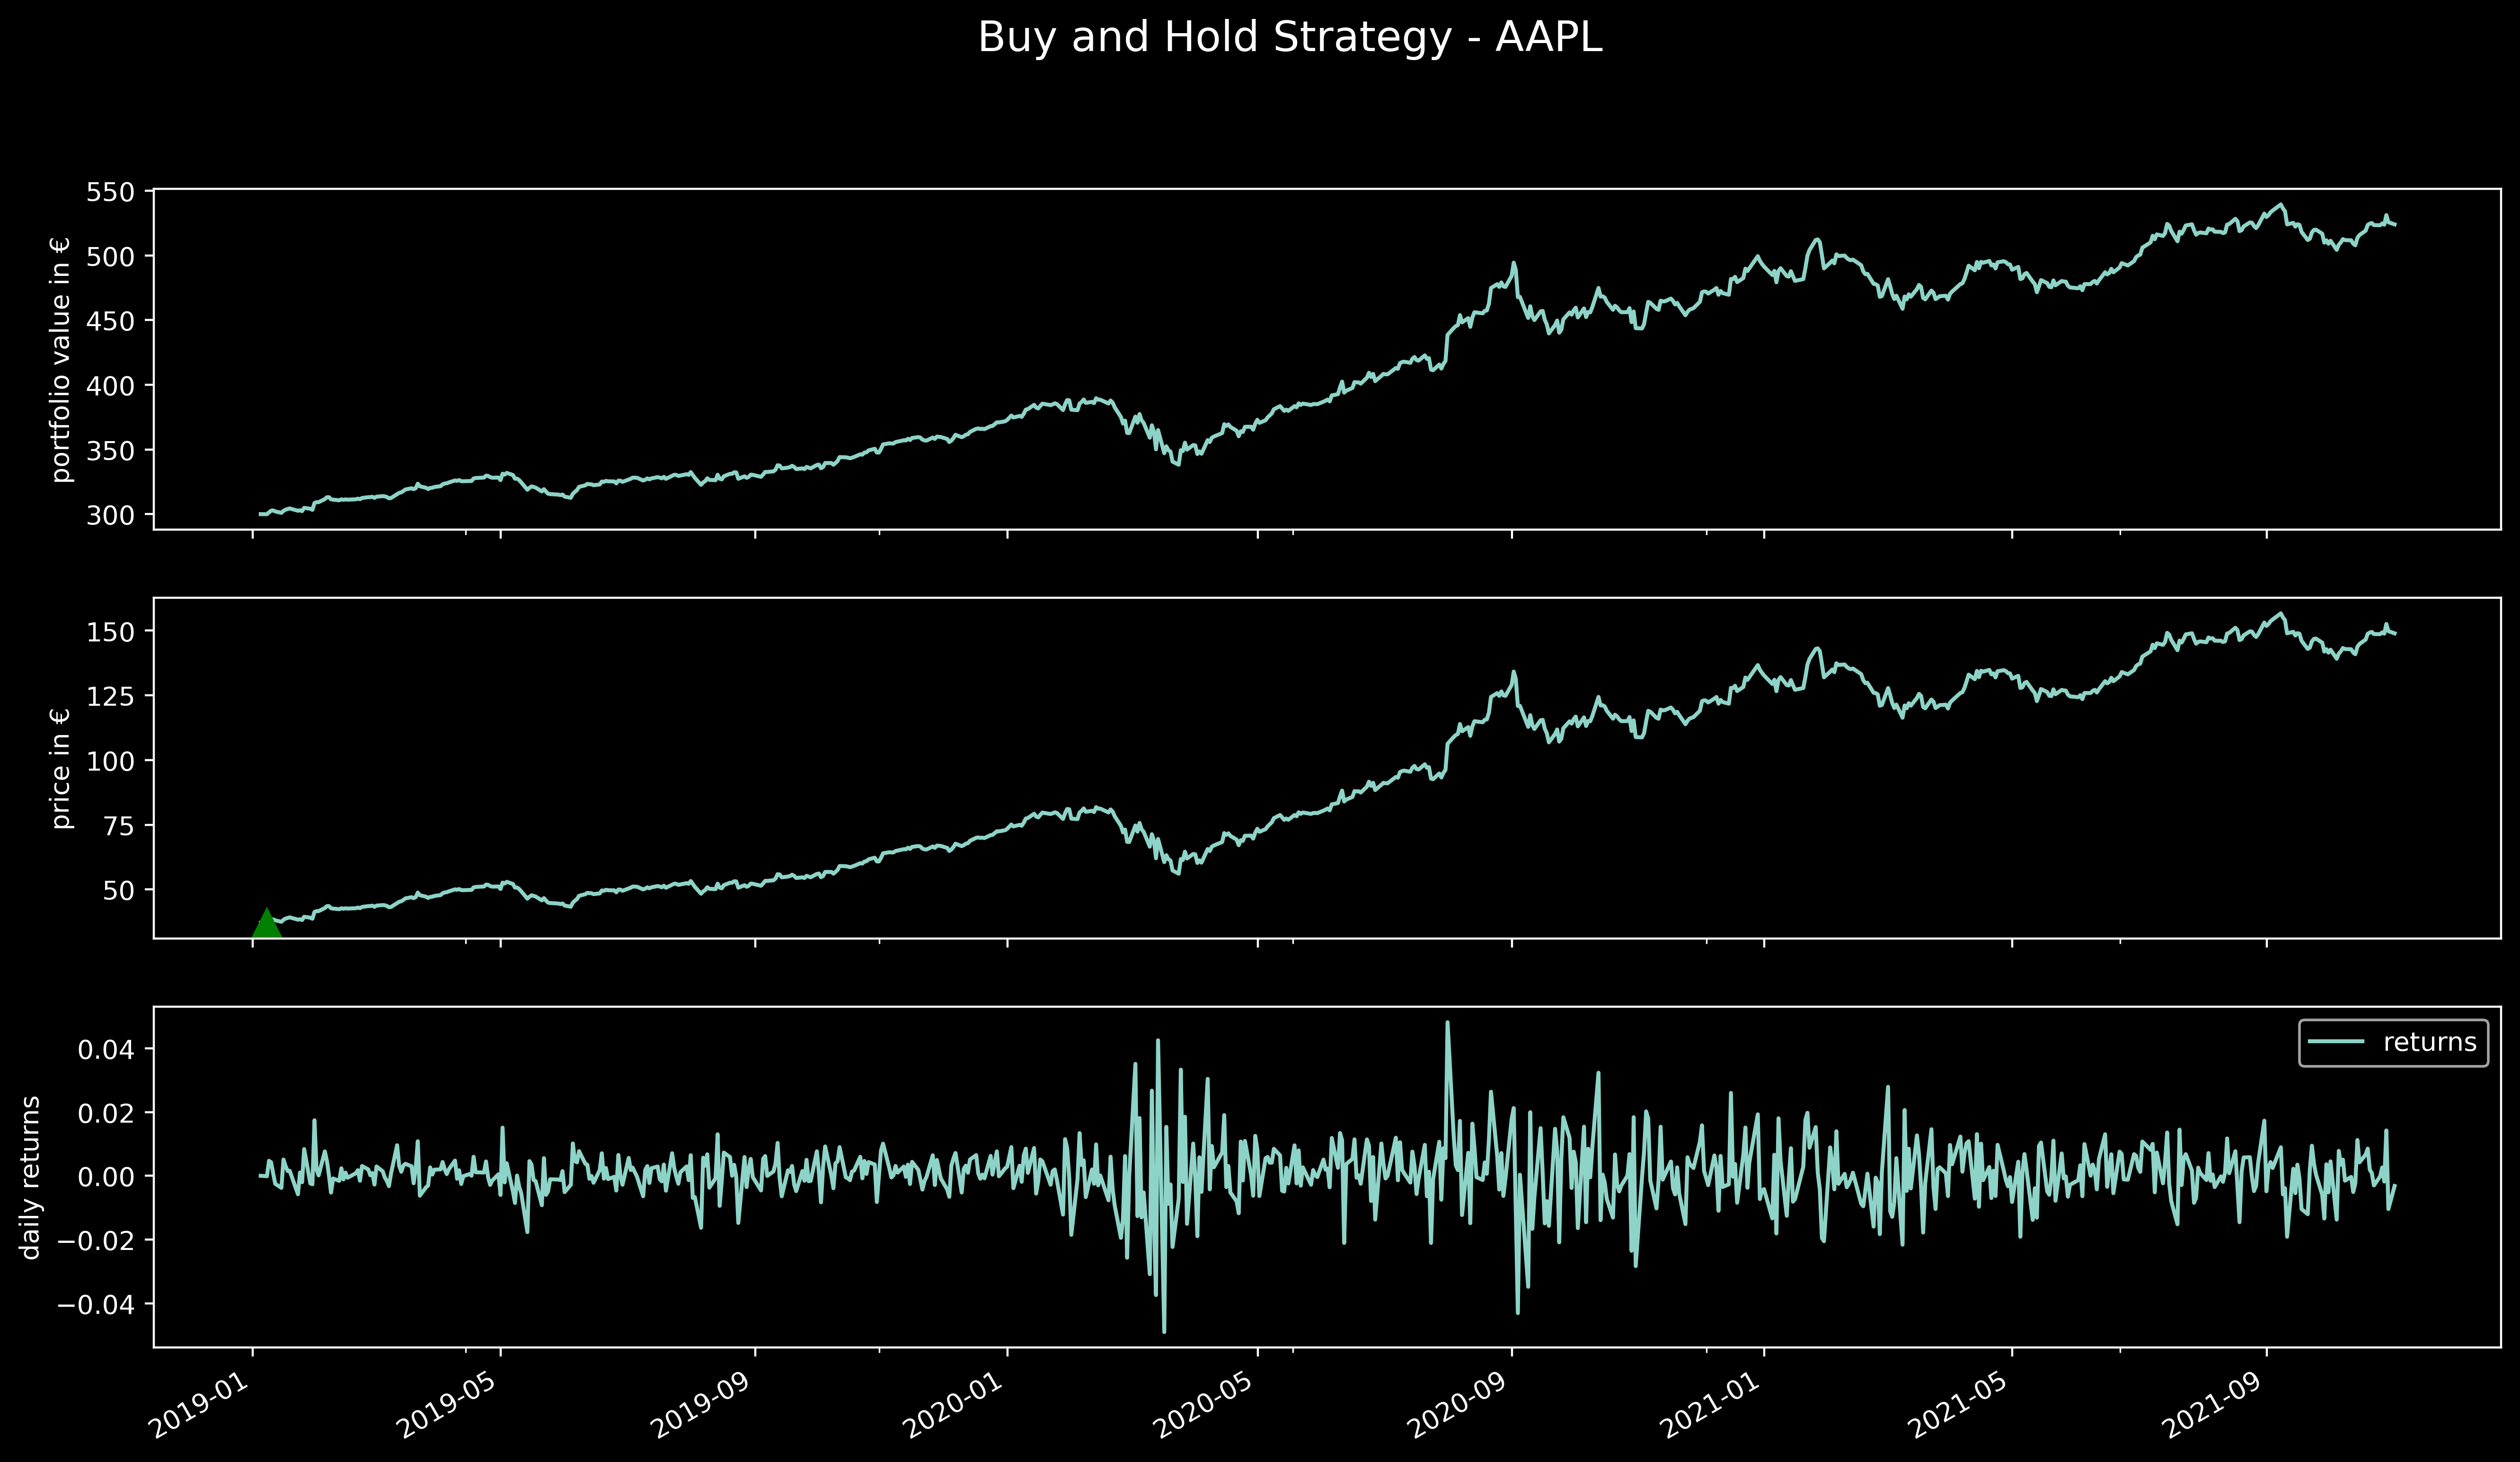

Final portfolio value (including cash): 523.92$


,period_open,period_close,starting_cash,ending_cash,portfolio_value,returns,longs_count,shorts_count,long_value,short_value,...,algo_volatility,benchmark_period_return,benchmark_volatility,alpha,beta,sharpe,sortino,max_drawdown,max_leverage,excess_return
2019-01-04 21:00:00+00:00,2019-01-04 14:31:00+00:00,2019-01-04 21:00:00+00:00,300.000000,300.000000,300.000000,0.000000,0,0,0.000,0.0,...,NaN,0.034336,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.0
2019-01-07 21:00:00+00:00,2019-01-07 14:31:00+00:00,2019-01-07 21:00:00+00:00,300.000000,225.997018,299.961018,-0.000130,1,0,73.964,0.0,...,0.001459,0.041587,0.306725,-0.040314,0.004755,-11.224972,-11.224972,-0.000130,0.246579,0.0
2019-01-08 21:00:00+00:00,2019-01-08 14:31:00+00:00,2019-01-08 21:00:00+00:00,225.997018,225.997018,301.373018,0.004707,1,0,75.376,0.0,...,0.043751,0.051685,0.239088,1.007362,-0.073071,8.788382,322.856694,-0.000130,0.250109,0.0
2019-01-09 21:00:00+00:00,2019-01-09 14:31:00+00:00,2019-01-09 21:00:00+00:00,225.997018,225.997018,302.651018,0.004241,1,0,76.654,0.0,...,0.041718,0.055995,0.220495,1.486014,-0.102712,13.316288,538.634385,-0.000130,0.253275,0.0
2019-01-10 21:00:00+00:00,2019-01-10 14:31:00+00:00,2019-01-10 21:00:00+00:00,225.997018,225.997018,302.897018,0.000813,1,0,76.900,0.0,...,0.037455,0.060767,0.201969,1.039160,-0.075881,12.959131,526.177665,-0.000130,0.253882,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-26 20:00:00+00:00,2021-10-26 13:31:00+00:00,2021-10-26 20:00:00+00:00,225.997018,225.997018,524.637018,0.002599,1,0,298.640,0.0,...,0.145718,0.562439,0.218421,0.136989,0.442990,1.436641,2.123110,-0.131972,0.581004,0.0
2021-10-27 20:00:00+00:00,2021-10-27 13:31:00+00:00,2021-10-27 20:00:00+00:00,225.997018,225.997018,523.697018,-0.001792,1,0,297.700,0.0,...,0.145623,0.562439,0.218268,0.136059,0.443002,1.431181,2.115036,-0.131972,0.581004,0.0
2021-10-28 20:00:00+00:00,2021-10-28 13:31:00+00:00,2021-10-28 20:00:00+00:00,225.997018,225.997018,531.137018,0.014207,1,0,305.140,0.0,...,0.145738,0.562439,0.218114,0.141601,0.442928,1.462588,2.164684,-0.131972,0.581004,0.0
2021-10-29 20:00:00+00:00,2021-10-29 13:31:00+00:00,2021-10-29 20:00:00+00:00,225.997018,225.997018,525.597018,-0.010430,1,0,299.600,0.0,...,0.145790,0.562439,0.217961,0.137173,0.442987,1.434692,2.121432,-0.131972,0.581004,0.0


In [9]:
%%zipline --start 2019-1-4 --end 2021-11-1 --capital-base 300 --bundle yahoo_direct --trading-calendar NYSE

# imports
from zipline.api import order, symbol, record, set_benchmark
import pandas as pd
import pandas_datareader.data as web
import numpy as np
# parameters
selected_stock = 'AAPL'
n_stocks_to_buy = 2
import matplotlib.pyplot as plt
start = pd.Timestamp('4-1-2012')
end = pd.Timestamp('1-9-2021')
sp500 = web.DataReader('SP500', 'fred', start, end).SP500
benchmark_returns = sp500.pct_change().tz_localize('UTC')

def initialize(context):
    context.benchmark_returns = benchmark_returns
    context.asset = symbol('AAPL')
    context.has_ordered = False  

def handle_data(context, data):
    # record price for further inspection
    record(price=data.current(symbol(selected_stock), 'price'))
    # trading logic
    if not context.has_ordered:
        # placing order, negative number for sale/short
        order(symbol(selected_stock), n_stocks_to_buy)
        # setting up a flag for holding a position
        context.has_ordered = True

def analyze(context, perf):
    perf.to_csv('perf.csv')
    
    fig, ax = plt.subplots(3, 1, sharex=True, figsize=[16, 9])

    # portfolio value
    perf.portfolio_value.plot(ax=ax[0])
    ax[0].set_ylabel('portfolio value in €')

    # asset
    perf.price.plot(ax=ax[1])
    ax[1].set_ylabel('price in €')

    # mark transactions
    perf_trans = perf.loc[[t != [] for t in perf.transactions]]
    buys = perf_trans.loc[[t[0]['amount'] > 0 for t in perf_trans.transactions]]
    sells = perf_trans.loc[[t[0]['amount'] < 0 for t in perf_trans.transactions]]
    ax[1].plot(buys.index, perf.price.loc[buys.index], '^', markersize=10, color='g', label='buy')
    ax[1].plot(sells.index, perf.price.loc[sells.index], 'v', markersize=10, color='r', label='sell')

    # daily returns
    perf.returns.plot(ax=ax[2])
    ax[2].set_ylabel('daily returns')

    fig.suptitle('Buy and Hold Strategy - AAPL', fontsize=16)
    plt.legend()
    plt.savefig(('buy_and_hold'), dpi=300)
    plt.show()
   


    print('Final portfolio value (including cash): {}$'.format(np.round(perf.portfolio_value[-1], 2)))

### Using Zipline with run_algorithm in IDE

In [15]:
from zipline import run_algorithm
from zipline.api import order, symbol, record, set_benchmark
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
# parameters
selected_stock = 'AAPL'
n_stocks_to_buy = 2
start = pd.Timestamp('1-1-2012')
end = pd.Timestamp('1-11-2021')
sp500 = web.DataReader('SP500', 'fred', start, end).SP500
benchmark_returns = sp500.pct_change().tz_localize('UTC')
# algo
def initialize(context):
    context.benchmark_returns = benchmark_returns
    context.asset = symbol('AAPL')
    context.has_ordered = False  

def handle_data(context, data):
    # record price for further inspection
    record(price=data.current(symbol(selected_stock), 'price'))
    # trading logic
    if not context.has_ordered:
        # placing order, negative number for sale/short
        order(symbol(selected_stock), n_stocks_to_buy)
        # setting up a flag for holding a position
        context.has_ordered = True
# results
buy_and_hold_results = run_algorithm(start=start.tz_localize('UTC'),
                       end=end.tz_localize('UTC'),
                       initialize=initialize,
                       handle_data=handle_data,
                       capital_base=300,
                       benchmark_returns=benchmark_returns,
                       bundle='yahoo_direct',
                       data_frequency='daily')

In [12]:
#buy_and_hold_results = result

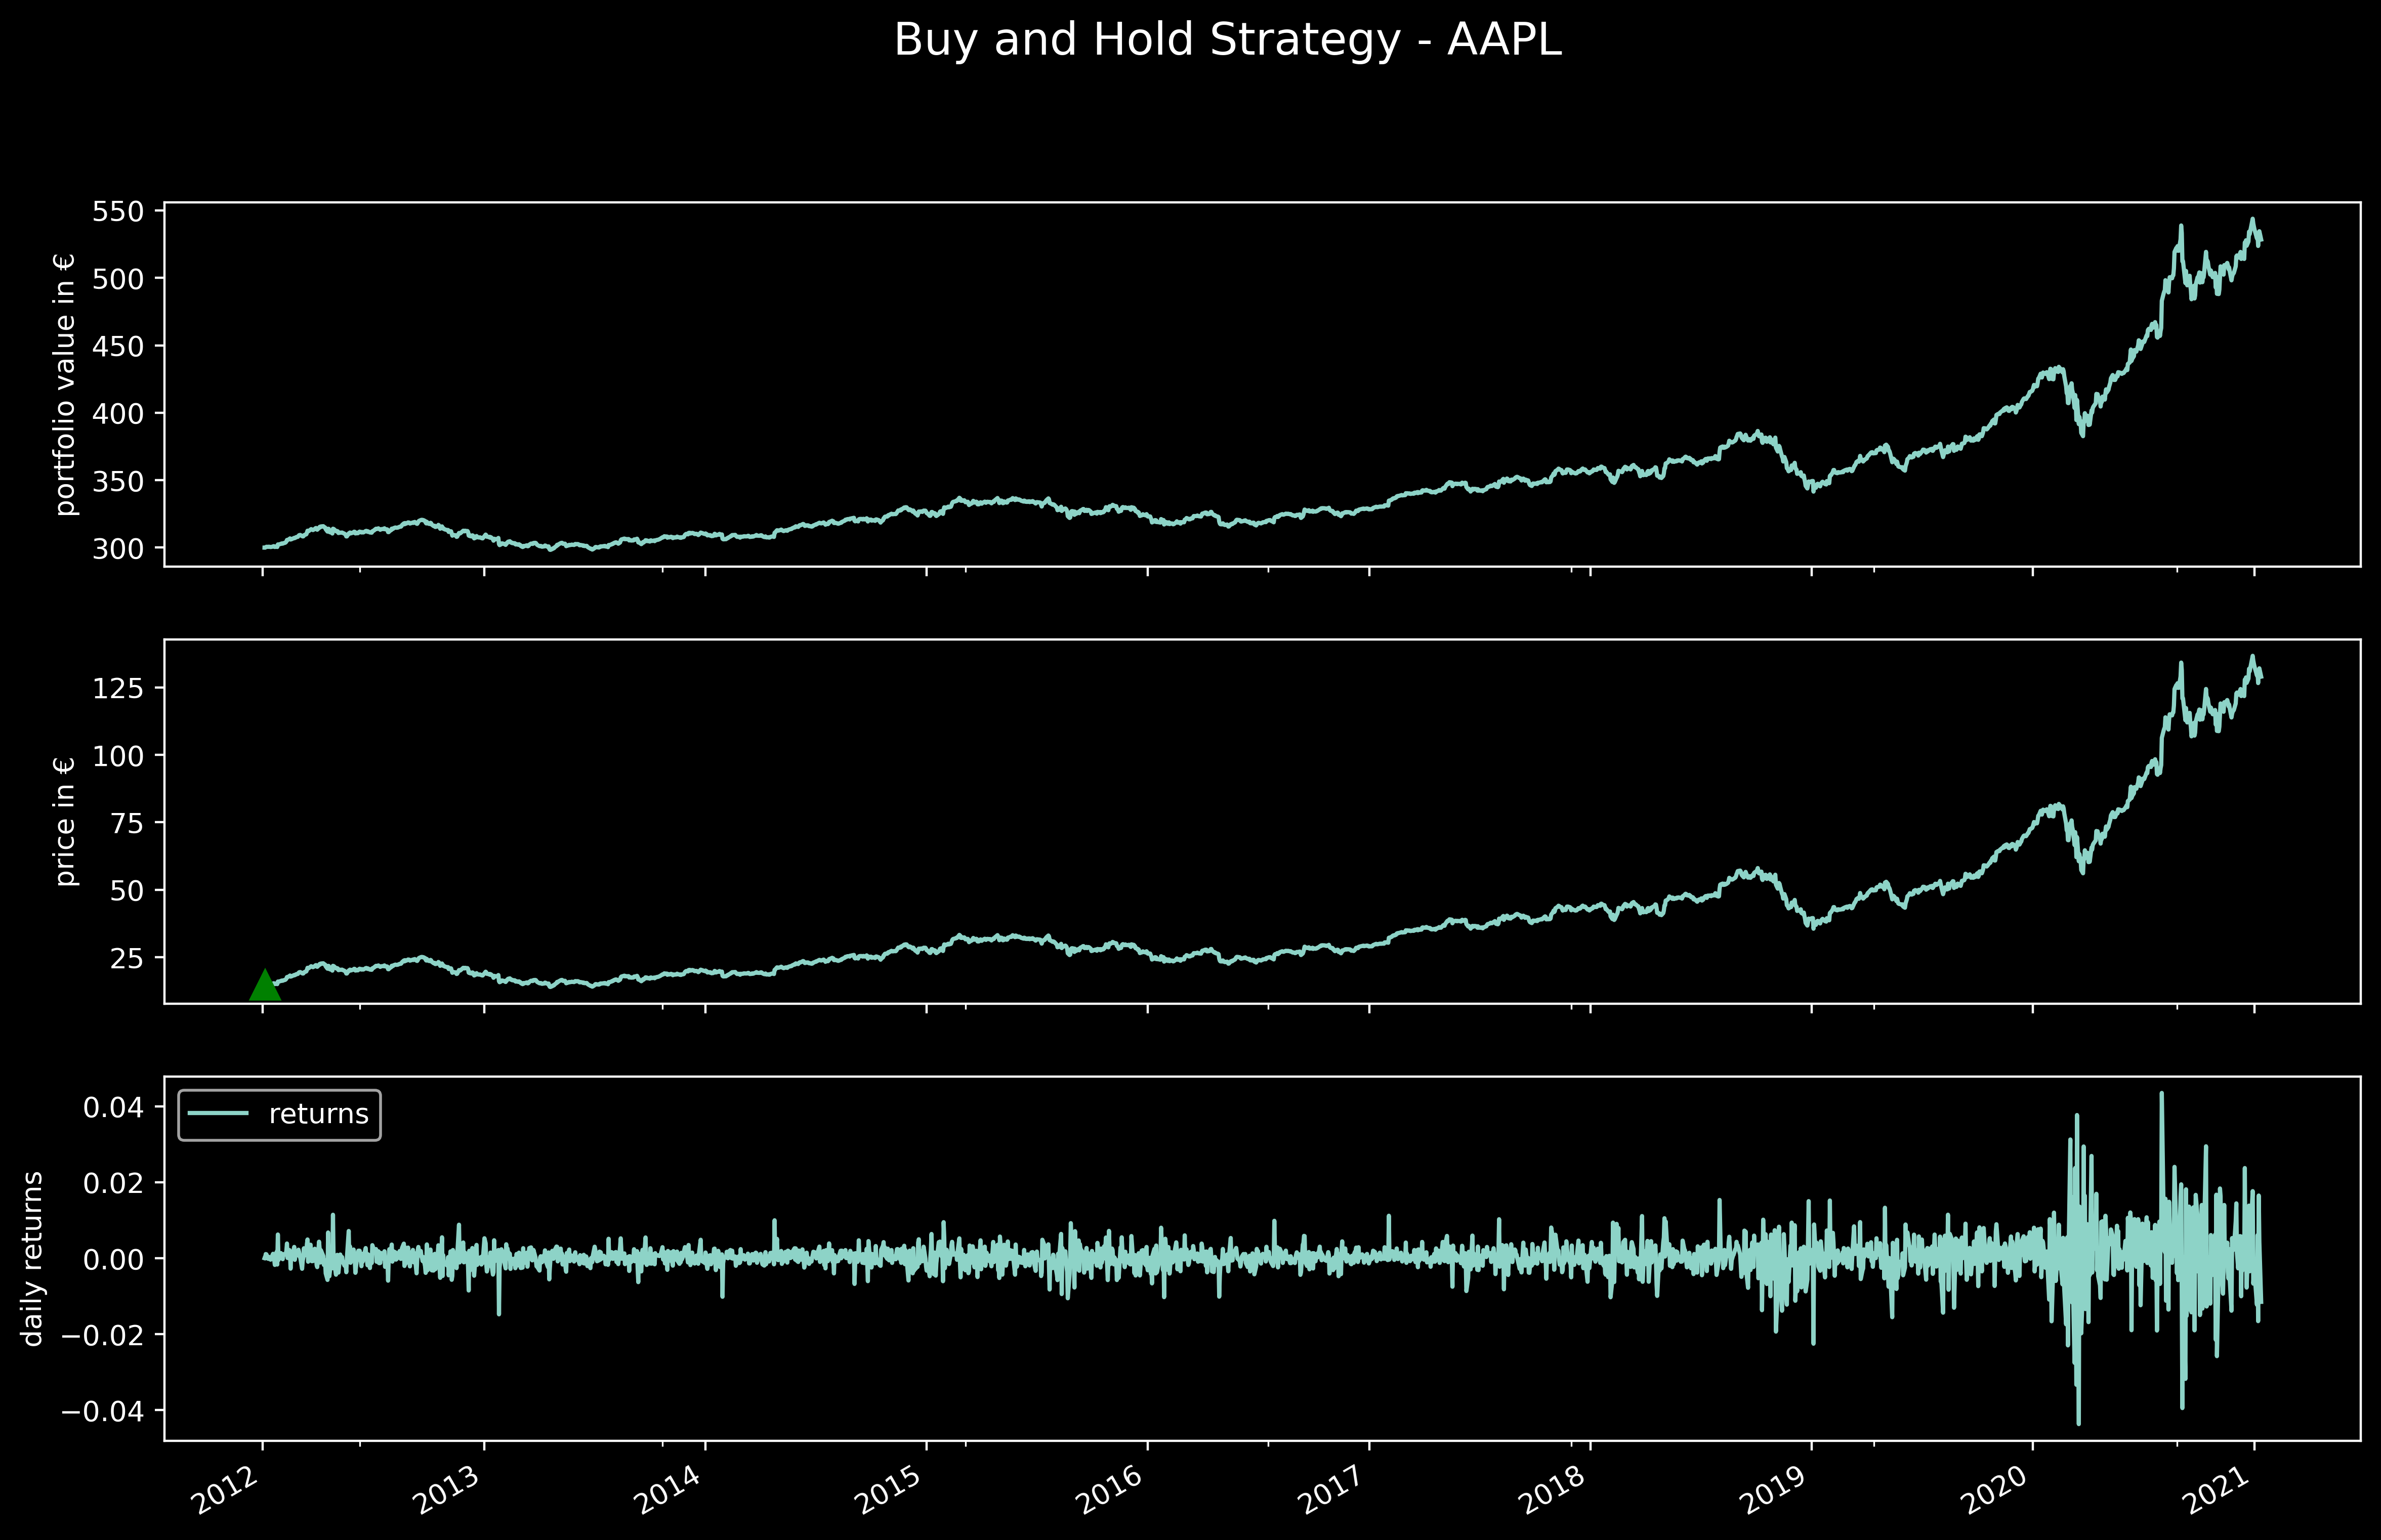

Final portfolio value (including cash): 528.41$


In [16]:
#buy_and_hold_results = result

fig, ax = plt.subplots(3, 1, sharex=True, figsize=[14, 9])

# portfolio value
buy_and_hold_results.portfolio_value.plot(ax=ax[0])
ax[0].set_ylabel('portfolio value in €')

# asset
buy_and_hold_results.price.plot(ax=ax[1])
ax[1].set_ylabel('price in €')

# mark transactions
perf_trans = buy_and_hold_results.loc[[t != [] for t in buy_and_hold_results.transactions]]
buys = perf_trans.loc[[t[0]['amount'] > 0 for t in perf_trans.transactions]]
sells = perf_trans.loc[[t[0]['amount'] < 0 for t in perf_trans.transactions]]
ax[1].plot(buys.index, buy_and_hold_results.price.loc[buys.index], '^', markersize=10, color='g', label='buy')
ax[1].plot(sells.index, buy_and_hold_results.price.loc[sells.index], 'v', markersize=10, color='r', label='sell')

# daily returns
buy_and_hold_results.returns.plot(ax=ax[2])
ax[2].set_ylabel('daily returns')

fig.suptitle('Buy and Hold Strategy - AAPL', fontsize=16)
plt.legend()
plt.savefig('Buy_and_Hold_Strategy_AAPL', dpi=300)
plt.show()

print('Final portfolio value (including cash): {}$'.format(np.round(buy_and_hold_results.portfolio_value[-1], 2)))

To view the transactions we need to transform the transactions column from the performance DataFrame.

In [17]:
pd.DataFrame.from_records([x[0] for x in buy_and_hold_results.transactions.values if x != []])

,amount,dt,price,order_id,sid,commission
0,2,2012-01-04 21:00:00+00:00,14.773383,b95be1eab4864b64a229cc9e7d25e713,Equity(39 [AAPL]),None


By inspecting the columns of the performance `DataFrame` we can see all the available metrics.

In [25]:
buy_and_hold_results.columns

Index(['period_open', 'period_close', 'ending_exposure', 'starting_value',
       'ending_value', 'starting_cash', 'ending_cash', 'portfolio_value',
       'longs_count', 'shorts_count', 'long_value', 'short_value', 'returns',
       'long_exposure', 'pnl', 'capital_used', 'short_exposure', 'orders',
       'transactions', 'positions', 'gross_leverage', 'starting_exposure',
       'net_leverage', 'price', 'alpha', 'beta', 'sharpe', 'sortino',
       'max_drawdown', 'max_leverage', 'excess_return',
       'treasury_period_return', 'trading_days', 'period_label',
       'algorithm_period_return', 'algo_volatility', 'benchmark_period_return',
       'benchmark_volatility'],
      dtype='object')

Some of the noteworthy ones:
* starting/ending cash - inspecting the cash holding on a given day
* starting/ending value - inspecting the assets; value on a given day
* orders - used for inspecting orders; there are different events for creating an order when the trading strategy generates a signal, and a separate one when it is actually executed on the next trading day
* pnl - daily profit and loss

In [18]:
print(buy_and_hold_results.info(null_counts=True))

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2271 entries, 2012-01-03 21:00:00+00:00 to 2021-01-11 21:00:00+00:00
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   period_open              2271 non-null   datetime64[ns, UTC]
 1   period_close             2271 non-null   datetime64[ns, UTC]
 2   portfolio_value          2271 non-null   float64            
 3   longs_count              2271 non-null   int64              
 4   shorts_count             2271 non-null   int64              
 5   long_value               2271 non-null   float64            
 6   short_value              2271 non-null   float64            
 7   returns                  2271 non-null   float64            
 8   long_exposure            2271 non-null   float64            
 9   pnl                      2271 non-null   float64            
 10  short_exposure           2271 non-null   float64

In [27]:
buy_and_hold_results.to_csv('buy_and_hold_results.csv')

## Simple Moving Average Strategy

In [28]:
from zipline import run_algorithm
from zipline.api import order_target, record, symbol, set_benchmark
from zipline.finance import commission
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import numpy as np
# parameters 
ma_periods = 20
selected_stock = 'AAPL'
n_stocks_to_buy = 2
start = pd.Timestamp('4-1-2018')
end = pd.Timestamp('1-11-2021')
sp500 = web.DataReader('SP500', 'fred', start, end).SP500
benchmark_returns = sp500.pct_change().tz_localize('UTC')
# algo 
def initialize(context):
    context.time = 0
    context.asset = symbol(selected_stock)
    context.benchmark_returns = benchmark_returns
    # 1. manually setting the commission
    context.set_commission(commission.PerShare(cost=0.0, min_trade_cost=0))

def handle_data(context, data):
    # 2. warm-up period
    context.time += 1
    if context.time < ma_periods:
        return

    # 3. access price history
    price_history = data.history(context.asset, fields="price", bar_count=ma_periods, frequency="1d")
 
    # 4. calculate moving averages
    ma = price_history.mean()
    
    # 5. trading logic
    
    # cross up
    if (price_history[-2] < ma) & (price_history[-1] > ma):
        order_target(context.asset, n_stocks_to_buy)
    # cross down
    elif (price_history[-2] > ma) & (price_history[-1] < ma):
        order_target(context.asset, 0)

    # save values for later inspection
    record(price=data.current(context.asset, 'price'),
           moving_average=ma)
    
# results
result = run_algorithm(start=start.tz_localize('UTC'),
                       end=end.tz_localize('UTC'),
                       initialize=initialize,
                       handle_data=handle_data,
                       capital_base=250,
                       benchmark_returns=benchmark_returns,
                       bundle='yahoo_direct',
                       data_frequency='daily')

/Users/mw/opt/anaconda3/lib/python3.8/site-packages/empyrical/stats.py:797: RuntimeWarning: invalid value encountered in true_divide
  np.divide(average_annual_return, annualized_downside_risk, out=out)
/Users/mw/opt/anaconda3/lib/python3.8/site-packages/empyrical/stats.py:706: RuntimeWarning: invalid value encountered in true_divide
  np.divide(


### Analyze Performance

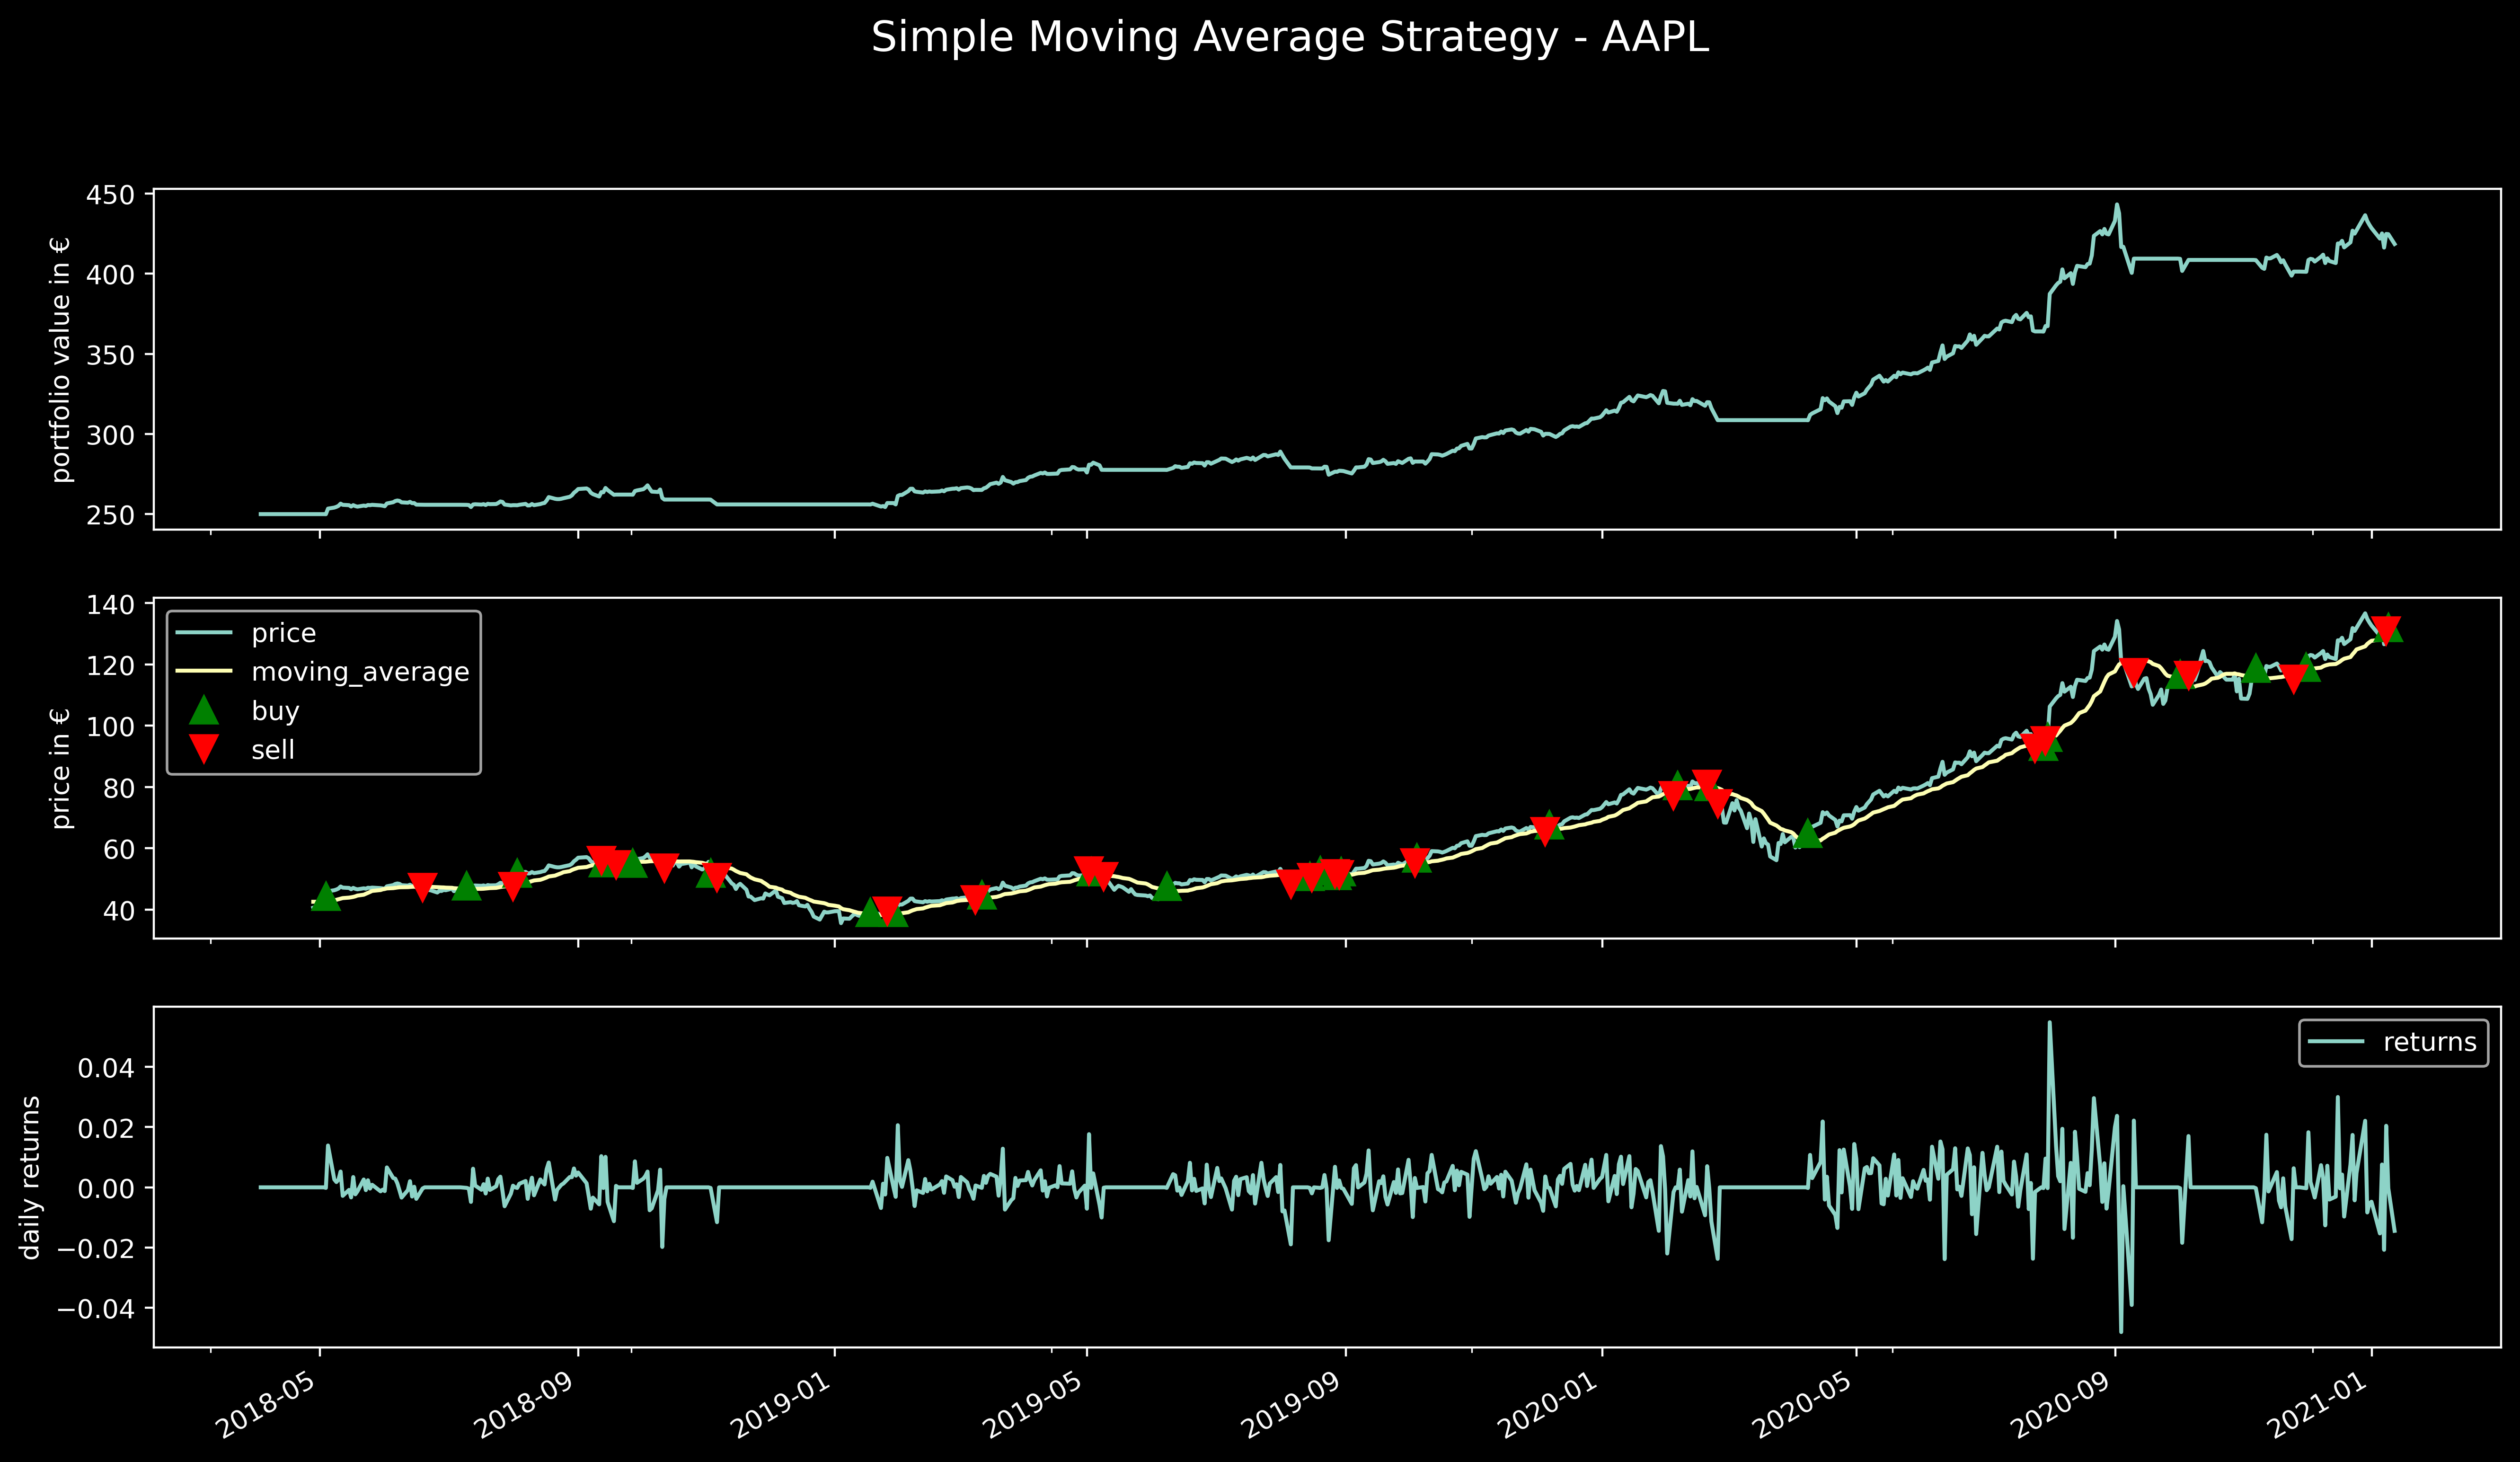

Final portfolio value (including cash): 418.57€


In [29]:
perf=result
fig, ax = plt.subplots(3, 1, sharex=True, figsize=[16, 9])

# portfolio value
perf.portfolio_value.plot(ax=ax[0])
ax[0].set_ylabel('portfolio value in €')
    
# asset
perf[['price', 'moving_average']].plot(ax=ax[1])
ax[1].set_ylabel('price in €')
    
# mark transactions
perf_trans = perf.loc[[t != [] for t in perf.transactions]]
buys = perf_trans.loc[[t[0]['amount'] > 0 for t in perf_trans.transactions]]
sells = perf_trans.loc[[t[0]['amount'] < 0 for t in perf_trans.transactions]]
ax[1].plot(buys.index, perf.price.loc[buys.index], '^', markersize=10, color='g', label='buy')
ax[1].plot(sells.index, perf.price.loc[sells.index], 'v', markersize=10, color='r', label='sell')
ax[1].legend()
    
# daily returns
perf.returns.plot(ax=ax[2])
ax[2].set_ylabel('daily returns')

fig.suptitle('Simple Moving Average Strategy - AAPL', fontsize=16)
plt.legend()
plt.savefig('Simple_Moving_Average_Strategy_AAPL', dpi=300)
plt.show()
    
print('Final portfolio value (including cash): {}€'.format(np.round(perf.portfolio_value[-1], 2)))
    

In [31]:
perf.to_csv('sma_aapl.csv')

In [32]:
sma = pd.read_csv('sma_aapl.csv', index_col=[0])